In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Dense, Flatten, Conv2D, MaxPooling2D

In [33]:
# Load the CSV file with image labels
csv_path = '/content/drive/MyDrive/archive/pokemon.csv'
image_folder = '/content/drive/MyDrive/archive/images'

In [34]:
data = pd.read_csv(csv_path)

In [35]:
# Preprocess images and labels
images = []
labels = []

for _, row in data.iterrows():

    img_path = os.path.join(image_folder, f"{row['Name'].lower()}.png")

    # If the .png file doesn't exist, try .jpg
    if not os.path.exists(img_path):
        img_path = os.path.join(image_folder, f"{row['Name'].lower()}.jpg")

    # Check if the image file exists
    if os.path.exists(img_path):
        img = Image.open(img_path).convert('RGB')
        img = img.resize((128, 128))  # Resize images to 128x128 pixels
        images.append(np.array(img))
        labels.append(row['Type1'])  # Update with the column name for labels
    else:
        print(f"Image file not found: {img_path}")


In [36]:
images = np.array(images)
labels = np.array(labels)
# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [38]:
# Normalize image data
X_train = X_train / 255.0
X_test = X_test / 255.0

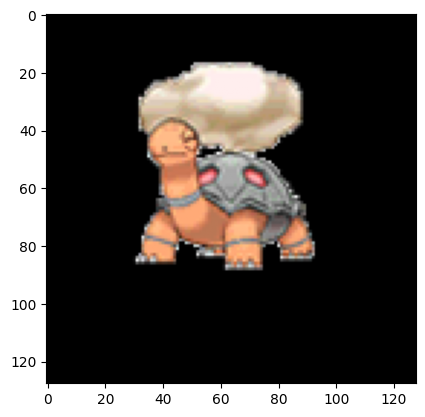

In [39]:
# Display an example image
plt.imshow(X_train[10])
plt.show()

In [40]:
# Create the model
model = Sequential()

# First convolutional layer with increased filters and dropout
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer with increased filters and dropout
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output from convolutional layers
model.add(Flatten())

# Densely connected layers with increased units and dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │      58,982,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,063,690 (225.31 MB)

 Trainable params: 59,063,690 (225.31 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Create the model
model = Sequential()

# First convolutional layer with adjusted filters and dropout
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Second convolutional layer with adjusted filters and dropout
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Flatten the output from convolutional layers
model.add(Flatten())

# Densely connected layers with adjusted units and dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,768,069 (56.34 MB)

 Trainable params: 14,768,069 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Create the model (your existing model definition)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((4, 4)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Adjust the output layer to match the number of classes
model.add(Dense(5, activation='softmax')) # Changed to num_classes

# Print the model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 29, 29, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,886,021 (49.16 MB)

 Trainable params: 12,886,021 (49.16 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [45]:
# Check unique values in y_train and remap if needed
unique_labels = np.unique(y_train)
num_classes = len(unique_labels)

# If the number of classes is not 10 and labels are not in range [0,num_classes-1], remap them:
if num_classes != 10 or not np.all(np.isin(unique_labels, np.arange(num_classes))):
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    y_train = np.vectorize(label_mapping.get)(y_train)

# Create the model (your existing model definition)
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Adjust the output layer to match the number of classes
model.add(Dense(num_classes, activation='softmax')) # Changed to num_classes

# Compile the model using sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[early_stopping])

# Before compiling the model, ensure your labels are in the correct range
y_train = np.clip(y_train, 0, 9)  # Clip values to be within [0, 9]

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.0864 - loss: 3.5541 - val_accuracy: 0.1462 - val_loss: 2.8837
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.1142 - loss: 2.8767 - val_accuracy: 0.1308 - val_loss: 2.8580
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.1472 - loss: 2.7489 - val_accuracy: 0.1231 - val_loss: 2.7446
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.2287 - loss: 2.4563 - val_accuracy: 0.0923 - val_loss: 2.7500
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4498 - loss: 1.8069 - val_accuracy: 0.1077 - val_loss: 3.0302
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6679 - loss: 1.0562 - val_accuracy: 0.1077 - val_loss: 3.6694
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8047 - loss: 0.6210 - val_accuracy: 0.1231 - val_loss: 3.9987
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8957 - loss: 0.3238 - val_accuracy: 0.1385 - val_loss:

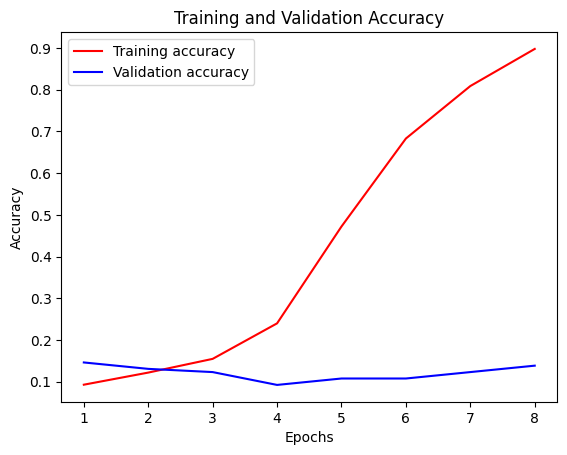

In [47]:
# Extract accuracy data for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy
epochs_range = range(1, len(acc) + 1)
plt.plot(epochs_range, acc, 'r', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step


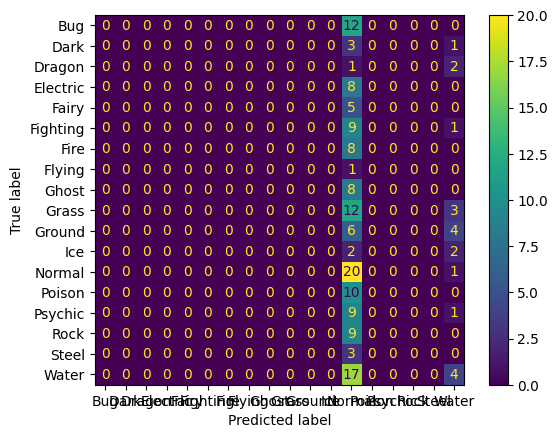

In [52]:
y_pred_probs = model. predict(X_test) # Get predicted probabilities
# Convert predicted probabilities to class labels
y_pred = np.argmax (y_pred_probs, axis=1)
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) # Now y_pred contains class labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=le.classes_)
cm_display.plot()
plt.show ()


In [50]:
second_model = Sequential()
second_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))  # Updated input shape to match X_train
second_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
second_model.add(Flatten())
second_model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))  # Update number of classes as needed

# Compile the second model
second_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Train the second model
second_history = second_model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[early_stopping])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4872 - loss: 1.9356 - val_accuracy: 0.6385 - val_loss: 1.5455
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7307 - loss: 1.0521 - val_accuracy: 0.5923 - val_loss: 1.4322
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8525 - loss: 0.4807 - val_accuracy: 0.6154 - val_loss: 1.8008
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9918 - loss: 0.0774 - val_accuracy: 0.6231 - val_loss: 2.5113
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9942 - loss: 0.0203 - val_accuracy: 0.6154 - val_loss: 2.6096
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.6231 - val_loss: 3.7375
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.6231 - val_loss: 3.5109


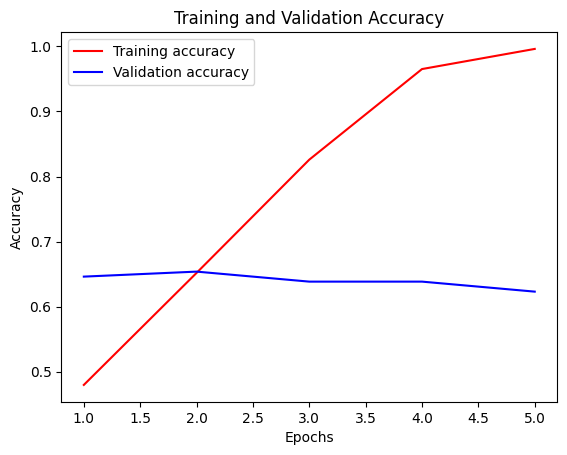

In [49]:
# Extract accuracy data for plotting
acc = second_history.history['accuracy']
val_acc = second_history.history['val_accuracy']

# Plot training and validation accuracy
epochs_range = range(1, len(acc) + 1)
plt.plot(epochs_range, acc, 'r', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()